

---


#  🟢 Plota Mapa de Focos de Calor de 2023 e 2024 + Linhas de Transmissão


---
**DADOS**:

 - Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/



---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 04/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---

# **1° Passo:** Preparando ambiente

In [1]:
# instalações
!pip install -q ultraplot cartopy salem rasterio #pyproj geopandas salem descartes

# Bibliotecas para manipulação de arquivos e sistema
import glob                                 # Lista arquivos em diretórios usando padrões (ex: *.nc)
import time                                 # Medição de tempo de execução e operações relacionadas a tempo

# Bibliotecas para computação numérica e dados
import numpy as np                          # Operações matemáticas eficientes com arrays multidimensionais
import pandas as pd                         # Manipulação e análise de dados em estruturas tabulares (DataFrames)
import xarray as xr                         # Trabalho com arrays multidimensionais rotulados (comum em dados científicos)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt             # Criação de gráficos e visualizações 2D/3D (biblioteca base)
import ultraplot as uplt                    # Visualização especializada para dados meteorológicos

# Bibliotecas para georreferenciamento e mapeamento
import cartopy                              # Ferramentas para criação de mapas e projeções cartográficas
import cartopy.crs as ccrs                  # Sistemas de referência de coordenadas para projeções de mapas
import cartopy.io.shapereader as shpreader  # Leitura de arquivos shapefile para mapas
import salem                                # Integração de dados geoespaciais com xarray

# Controle de avisos
import warnings                             # Gerenciamento de mensagens de alerta durante a execução
warnings.filterwarnings("ignore")           # Supressão de avisos para manter a saída limpa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **2° Passo:** Declarando Funções

In [2]:
# Função que calcula o índice i e j da localização do foco de calor
def index(longitudes_matriz, latitudes_matriz, lon_foco, lat_foco):

    ''' Função para calcular o índice (i e j) do pixel de uma matriz que o relâmpago pertence

    Parâmetros:
               longitudes_matriz (array): array de uma dimensão das longitudes da matriz em graus
               latitudes_matriz (array): array de uma dimensão das latitudes da matriz em graus
               lon_raio (float): valor da longitude do foco em graus
               lat_raio (float): valor da latitude do foco em graus

    Retorna:
            indice_lat_raio (float): índice da latitude (ou seja, da linha) do pixel da matriz que o foco pertence
            indice_lon_raio (float): índice da longitude (ou seja, da coluna) do pixel da matriz que o foco pertence
    '''

    # calcula a diferença entre as lats/lons da matriz e a latitude/longitude do foco
    distancia_lon = (longitudes_matriz - lon_foco)**2
    distancia_lat = (latitudes_matriz - lat_foco)**2

    # índice da longitude e latitude do foco
    indice_lon_foco = np.nonzero(distancia_lon == np.min(distancia_lon))
    indice_lat_foco  = np.nonzero(distancia_lat == np.min(distancia_lat))

    # retorna os valores dos índices calculados
    return indice_lat_foco, indice_lon_foco

# **3° Passo:** Baixando os Dados do INPE

In [3]:
%%time
# define os 2 anos que serão analisados
anos = ['2023', '2024']

# FTP dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# leitura da tabela: 2023
df_ano1 = pd.read_csv(f'{url}focos_br_ref_{anos[0]}.zip', compression='zip')

# leitura da tabela: 2023
df_ano2 = pd.read_csv(f'{url}focos_br_ref_{anos[1]}.zip', compression='zip')

# junta a tabela que foi lida com a anterior
df = pd.concat([df_ano1, df_ano2], ignore_index=True)

# transforma a coluna "data_pas" para o formato "datetime"
df['data_pas'] = pd.to_datetime(df['data_pas'])

# seta a coluna "data_pas" como o índice da tabela
df.set_index('data_pas', inplace=True)

# mostra os dados
df

CPU times: user 2.5 s, sys: 231 ms, total: 2.74 s
Wall time: 8.64 s


,id_bdq,foco_id,lat,lon,pais,estado,municipio,bioma
data_pas,,,,,,,,
2023-01-02 17:11:00,1615033233,9a03983d-e1b3-3df1-b5e6-0a4ca26e3548,-17.52869,-57.66138,Brasil,MATO GROSSO,CÁCERES,Pantanal
2023-01-02 17:11:00,1615033235,23953122-a8e4-3cd9-ac94-91aa2ad22ff4,-17.61373,-57.48255,Brasil,MATO GROSSO,POCONÉ,Pantanal
2023-01-02 17:11:00,1615033238,7067c6d1-9165-308c-a2c3-839d0f7c7925,-17.61592,-57.47493,Brasil,MATO GROSSO,POCONÉ,Pantanal
2023-01-02 17:13:00,1615033240,0b15e261-2a06-3e47-b07c-0fcc0245f305,-5.45368,-46.83593,Brasil,MARANHÃO,AMARANTE DO MARANHÃO,Cerrado
2023-01-02 17:13:00,1615033242,cebb86ae-4cbd-3acc-9e70-687003a37a60,-8.42510,-46.00357,Brasil,MARANHÃO,TASSO FRAGOSO,Cerrado
...,...,...,...,...,...,...,...,...
2024-12-31 17:49:00,1739558132,1f2f2ca9-1309-39e5-b154-cd2d3bd9582b,-11.95043,-49.48899,Brasil,TOCANTINS,FORMOSO DO ARAGUAIA,Cerrado
2024-12-31 17:49:00,1739558136,40c87323-63a5-38c2-b6a3-04b3f824e188,-18.83764,-50.07574,Brasil,MINAS GERAIS,SANTA VITÓRIA,Cerrado
2024-12-31 17:47:00,1739558141,2ffc5778-9bba-3431-a3c0-aa7a56b52332,-21.91783,-47.15528,Brasil,SÃO PAULO,CASA BRANCA,Cerrado


# **4° Passo:** Acumula na Grade

In [4]:
%%time
# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# Espaçamento da grade
delta = 20/100.   # grade com 20 km de resolução espacial

# Montando a grade
lons = np.arange(lonmin, lonmax, delta)
lats = np.arange(latmax, latmin, -delta)

# Quantidade de pontos para longitude e latitude
nlon = len(lons)
nlat = len(lats)

# Loop dos anos
for ano in anos:

    print('Processando ===>>>', ano)

    # seleciona o mês
    df_selec = df.loc[ano]

    # gera matriz de raios
    focos_lon, focos_lat = df_selec['lon'].values, df_selec['lat'].values

    # interpolando para ponto de grade
    focos = np.zeros((nlat, nlon))

    # loop em cada longitude e latitude da lista
    for lonfoco, latfoco in zip(focos_lon, focos_lat):

        # função que extrai a qual pixel aquele relâmpago pertence
        lin, col = index(lons, lats, lonfoco, latfoco)

        # soma os relâmpagos por pixel
        focos[lin,col]+=1

    # gera arquivo netcdf
    data_vars = {'focos':(('lat', 'lon'), focos, {'units': 'ocorrências/400km²', 'long_name':'Focos de Calor'})}

    coords = {'lat': lats, 'lon': lons}

    ds = xr.Dataset(data_vars=data_vars, coords=coords)

    ds.to_netcdf(f'focos_anual_Brasil_AQUA_{ano}.nc')

Processando ===>>> 2023
Processando ===>>> 2024
CPU times: user 26.8 s, sys: 407 ms, total: 27.2 s
Wall time: 35.6 s


In [5]:
# mostrando arquivo gerado de 2023
ds_2023 = xr.open_dataset('/content/focos_anual_Brasil_AQUA_2023.nc')
ds_2023

<xarray.Dataset> Size: 356kB
Dimensions:  (lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 2kB 7.0 6.8 6.6 6.4 6.2 ... -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 2kB -75.0 -74.8 -74.6 -74.4 ... -33.6 -33.4 -33.2
Data variables:
    focos    (lat, lon) float64 353kB ...

In [6]:
# mostrando arquivo gerado de 2024
ds_2024 = xr.open_dataset('/content/focos_anual_Brasil_AQUA_2024.nc')
ds_2024

<xarray.Dataset> Size: 356kB
Dimensions:  (lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 2kB 7.0 6.8 6.6 6.4 6.2 ... -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 2kB -75.0 -74.8 -74.6 -74.4 ... -33.6 -33.4 -33.2
Data variables:
    focos    (lat, lon) float64 353kB ...

# **5° Passo:** Plota Figura

In [7]:
# lendo os shapefiles das LT
import salem
LT = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/linhas_transmissao/LT_EXISTENTE.shp')

# tensão disponível
tensoes = LT['Tensao'].unique().tolist()
tensoes.sort()

# selecionando as tensões
LT_138 = LT.loc[LT['Tensao'] == 138.0]
LT_230 = LT.loc[LT['Tensao'] == 230.0]
LT_345 = LT.loc[LT['Tensao'] == 345.0]
LT_440 = LT.loc[LT['Tensao'] == 440.0]
LT_500 = LT.loc[LT['Tensao'] == 500.0]
LT_69 = LT.loc[LT['Tensao'] == 69.0]
LT_132 = LT.loc[LT['Tensao'] == 132.0]
LT_525 = LT.loc[LT['Tensao'] == 525.0]
LT_600 = LT.loc[LT['Tensao'] == 600.0]
LT_765 = LT.loc[LT['Tensao'] == 765.0]
LT_800 = LT.loc[LT['Tensao'] == 800.0]

print(len(tensoes))
print(tensoes)

11
[69.0, 132.0, 138.0, 230.0, 345.0, 440.0, 500.0, 525.0, 600.0, 765.0, 800.0]


CPU times: user 27.9 s, sys: 406 ms, total: 28.3 s
Wall time: 32.4 s


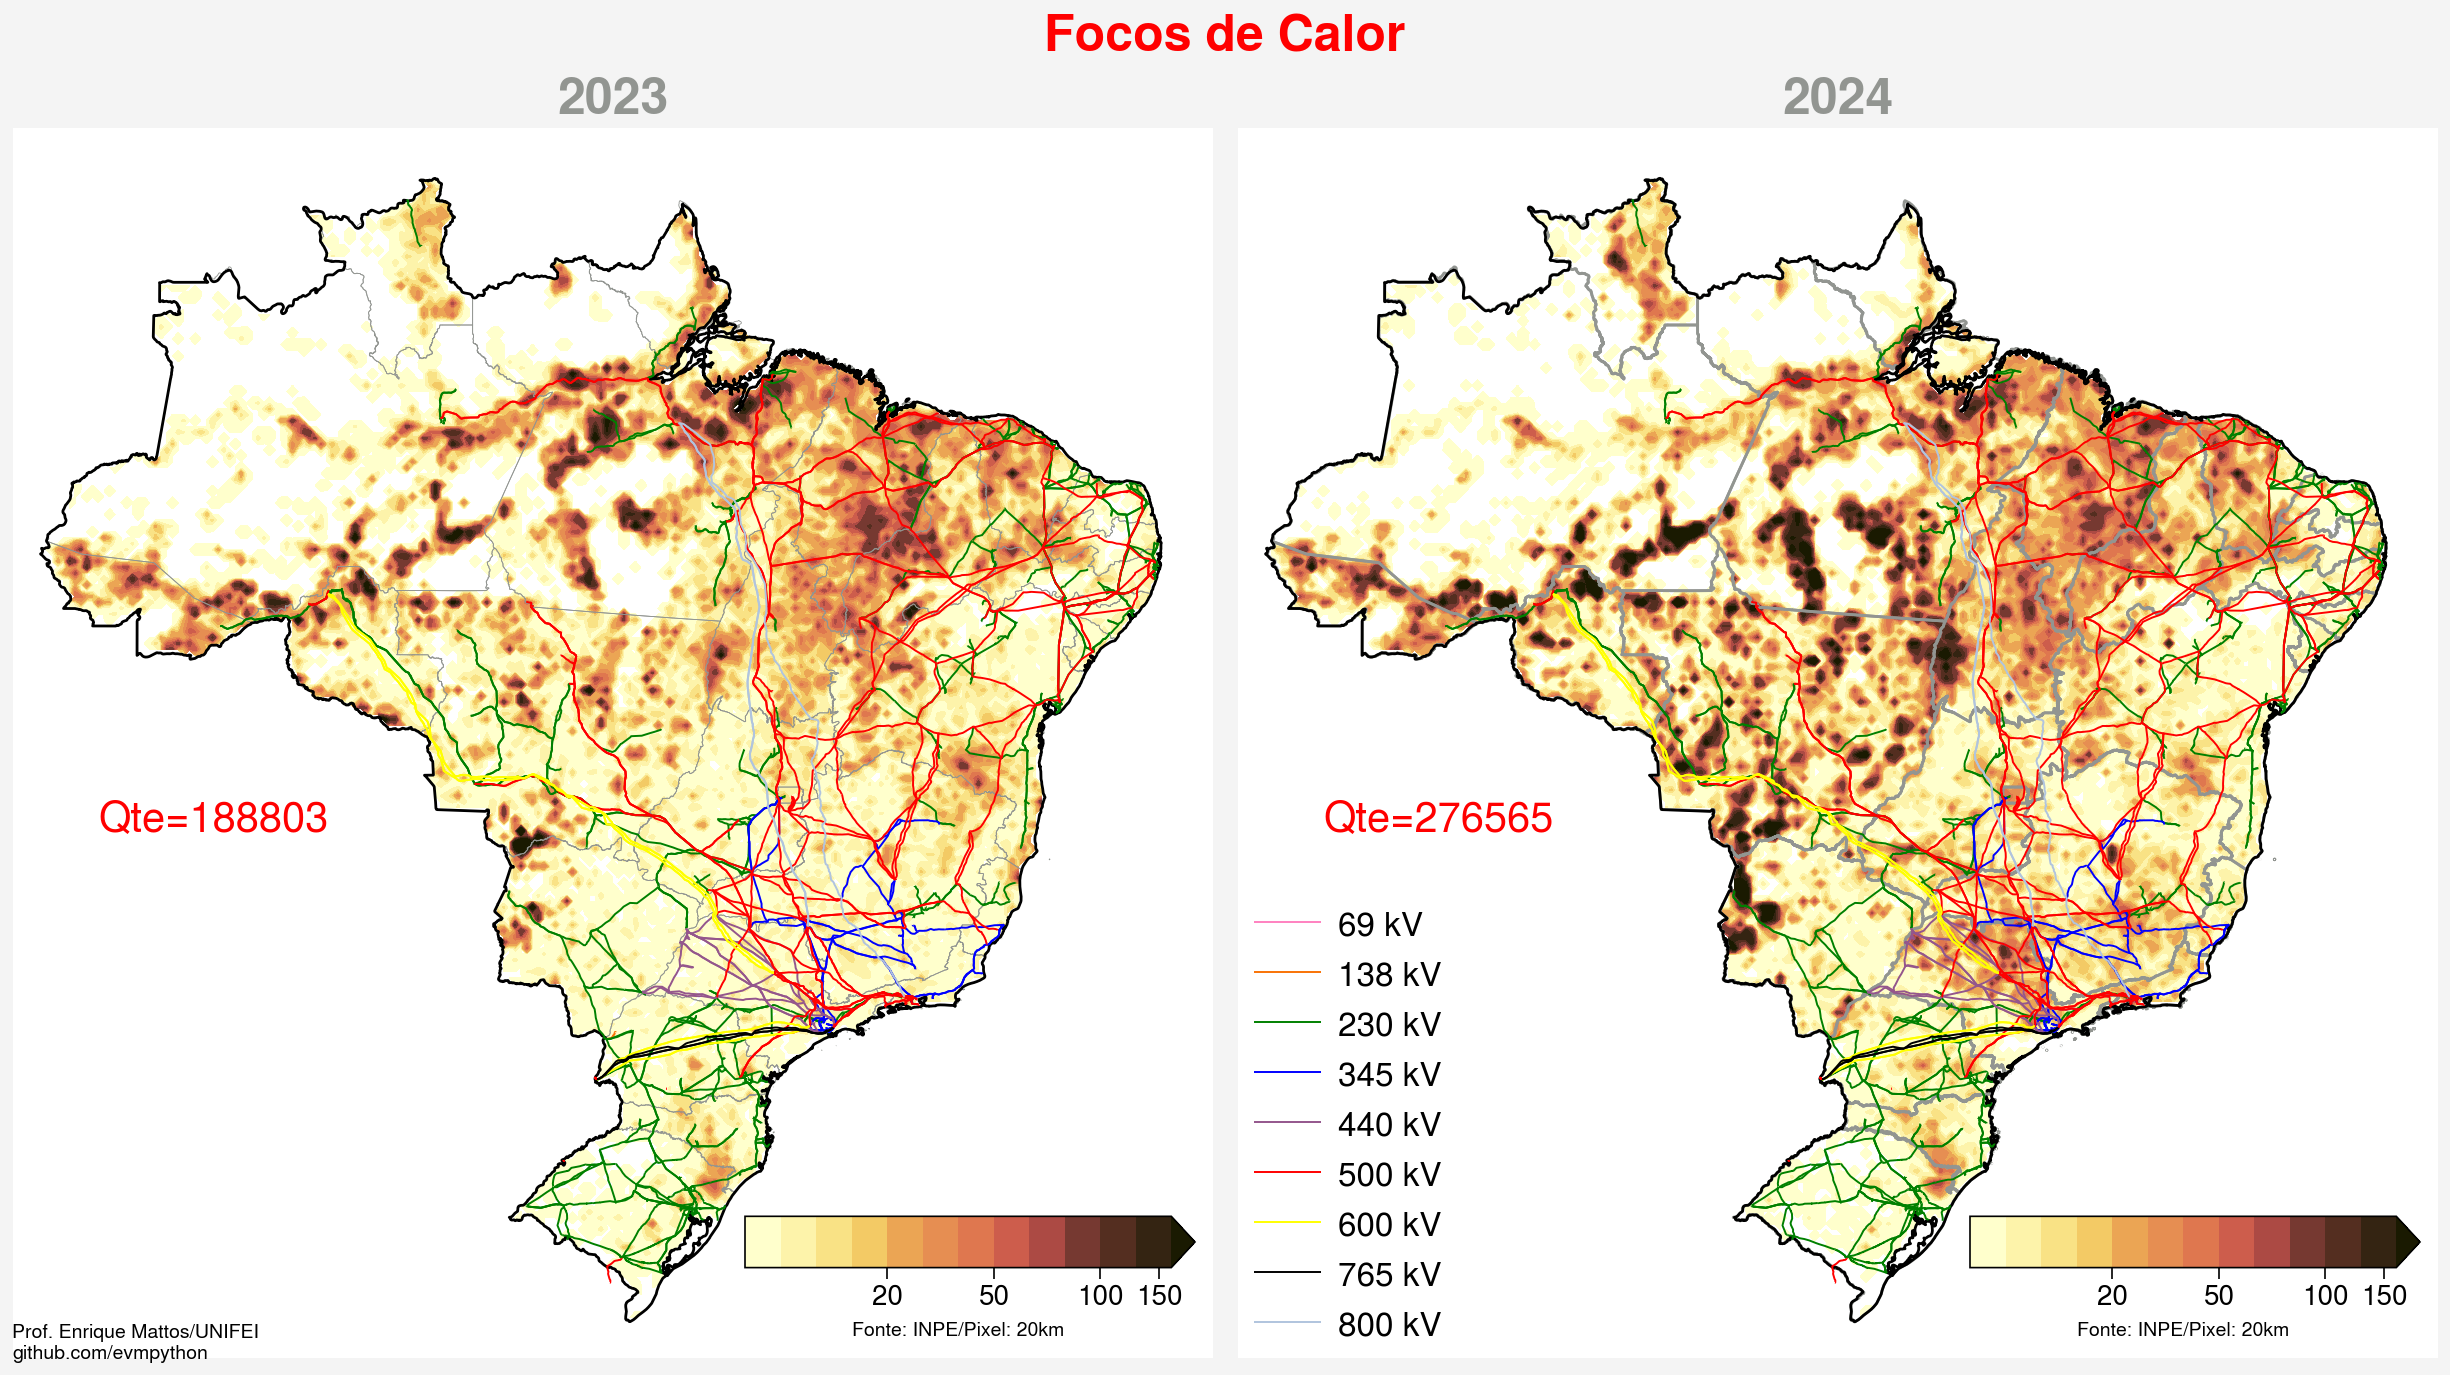

In [8]:
%%time
#========================================================================================================================#
#                                                DEFINIÇÕES
#========================================================================================================================#
# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# leitura do shapefile do Brasil
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

#========================================================================================================================#
#                                           PLOTA FIGURA
#========================================================================================================================#
# cria a moldura da figura
fig, ax = uplt.subplots(axwidth=6, ncols=2, nrows=1, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          small='20px', large='25px',
          linewidth=0, grid=False,
          suptitle='Focos de Calor', suptitlecolor='red')

#--------------------------------------------------------------#
#                            FIG-1
#--------------------------------------------------------------#
# leitura do arquivo netcdf
ds = xr.open_dataset(f'/content/focos_anual_Brasil_AQUA_{anos[0]}.nc')

# total de focos
total = ds['focos'].salem.roi(shape=shapefile_brasil)
total = int(np.sum(total))

# plota mapa
map1 = ax[0].contourf(ds['lon'],
                      ds['lat'],
                      ds['focos'].salem.roi(shape=shapefile_brasil),
                      alpha=1.0, zorder=1,
                      cmap='lajolla',
                      vmin=0.1, vmax=160,
                      levels=np.array([0.1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 100, 130, 160]),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Fonte: INPE/Pixel: 20km',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 10,
                                   'labelsize': 7,
                                   'width': 2,
                                   'ticks': [20, 50, 100, 150],
                                   'ticklabels': ['20', '50', '100', '150']})

# plota linhas de transmissão
LT_69.plot(edgecolor='pink', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='69 kV', zorder=2)
LT_138.plot(edgecolor='orange', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='138 kV', zorder=2)
LT_230.plot(edgecolor='green', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='230 kV', zorder=2)
LT_345.plot(edgecolor='blue', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='345 kV', zorder=2)
LT_440.plot(edgecolor='purple', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='440 kV', zorder=2)
LT_500.plot(edgecolor='red', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='500 kV', zorder=2)
LT_600.plot(edgecolor='yellow', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='600 kV', zorder=2)
LT_765.plot(edgecolor='black', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='765 kV', zorder=2)
LT_800.plot(edgecolor='lightsteelblue', facecolor='none', linewidth=0.7, alpha=1, ax=ax[0], label='800 kV', zorder=2)

# plota subtítulo
ax[0].format(title=anos[0],
             titleloc='c',
             titleweight='bold',
             titlecolor='gray')

# plota contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=0.3, alpha=1.0)

# plota contorno do Brasil
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# plota quantidade de eventos
ax[0].text(-72., -17., f'Qte={total}', color='red', fontsize=15)

# informação na figura
ax[0].annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(lonmin,latmin), fontsize=7, color='black')

#--------------------------------------------------------------#
#                            FIG-2
#--------------------------------------------------------------#
# leitura do arquivo netcdf
ds = xr.open_dataset(f'/content/focos_anual_Brasil_AQUA_{anos[1]}.nc')

# total de focos
total = ds['focos'].salem.roi(shape=shapefile_brasil)
total = int(np.sum(total))

# plota mapa
map2 = ax[1].contourf(ds['lon'],
                      ds['lat'],
                      ds['focos'].salem.roi(shape=shapefile_brasil),
                      alpha=1.0, zorder=1,
                      cmap='lajolla',
                      vmin=0.1, vmax=160,
                      levels=np.array([0.1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 100, 130, 160]),
                      extend='max',
                      colorbar='best',
                      colorbar_kw={'label': 'Fonte: INPE/Pixel: 20km',
                                   'length': 18,
                                   'frameon': False,
                                   'ticklabelsize': 10,
                                   'labelsize': 7,
                                   'width': 2,
                                   'ticks': [20, 50, 100, 150],
                                   'ticklabels': ['20', '50', '100', '150']})

# plota linhas de transmissão
LT_69.plot(edgecolor='pink', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='69 kV', zorder=2)
LT_138.plot(edgecolor='orange', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='138 kV', zorder=2)
LT_230.plot(edgecolor='green', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='230 kV', zorder=2)
LT_345.plot(edgecolor='blue', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='345 kV', zorder=2)
LT_440.plot(edgecolor='purple', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='440 kV', zorder=2)
LT_500.plot(edgecolor='red', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='500 kV', zorder=2)
LT_600.plot(edgecolor='yellow', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='600 kV', zorder=2)
LT_765.plot(edgecolor='black', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='765 kV', zorder=2)
LT_800.plot(edgecolor='lightsteelblue', facecolor='none', linewidth=0.7, alpha=1, ax=ax[1], label='800 kV', zorder=2)

# plota subtítulo
ax[1].format(title=anos[1],
             titleloc='c',
             titleweight='bold',
             titlecolor='gray')

# plota contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1.0)

# plota contorno do Brasil
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# legenda
ax[1].legend(loc='ll', ncols=1, frameon=False, prop={'size': 12.}, markerscale=1)

# plota quantidade de eventos
ax[1].text(-72., -17., f'Qte={total}', color='red', fontsize=15)
#--------------------------------------------------------------#

# salva figura
fig.savefig('01_mapa_focos_calor_2023_e_2024_com_LT.jpg', transparent=True, dpi=300, bbox_inches="tight")